# Linear regression
Linear regression is a powerful tool to model the relationship between a scalar dependent/response variable and one or more independent/explanatory variables. The response variable is assumed to change linearly in response to changes in any of the explanatory variables. When there is a single explanatory variable, a line-of-best-fit is drawn to model the correlation between the response and explanatory variable. In higher dimensions, a plane- or hyperplane-of-best-fit is used to model the affine relationship between the response and explanatory variables. Linear regression is featured heavily in data analysis for its ability to describe trends and relationships between variables in highly interpretable ways.

We will use linear regression to see if we can infer the weight of a LEGO set based on the width of the set.

## Data processing
Like we did for the Perceptron, we will analyze the dataset `Brickset-Most-Owned-Query-33-02042023.csv`. The dataset is described in greater detail in `Perceptron.ipynb`. The goal is to infer the weight of each LEGO set based on the width of the set. We will constraint analysis to Harry Potter-theme LEGO sets for consistency. The first step is to import and clean the dataset.

In [1]:
from ipynb.fs.defs.Neuron import SingleNeuron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in dataset and keep relevant columns/rows
df = pd.read_csv('data/Brickset-Most-Owned-Query-33-02042023.csv')
df = df[df["Theme"] == "Harry Potter"]
df = df[df["Weight"] > 0]
df = df.filter(["Number", "Width", "Weight"])
df = df.dropna()
n_sample = len(df.index)
print("There are ", n_sample, " observations.")
print(df)

There are  34  observations.
       Number  Width  Weight
366    4842-1  58.19    2.14
623   75969-1  48.00    1.45
650    4757-1  57.60    2.12
654    5378-1  57.60    1.65
739   75954-1  48.00    1.66
858   75955-1  54.00    1.37
867   75968-1  38.20    0.92
959   75953-1  48.00    1.10
1057  10132-1  57.60    2.58
1107  75952-1  38.20    0.85
1237   4841-1  54.00    1.22
1482   4840-1  35.41    1.03
1547   4768-1  48.00    1.20
1556   4766-1  38.40    0.80
1907   4867-1  48.01    0.91
2006   4756-1  38.40    0.93
2011   4738-1  48.01    0.81
2309   4758-1  33.60    0.79
2951   4754-1  28.80    0.58
3135   4866-1  28.19    0.56
3289   4767-1  38.40    0.62
3413  75967-1  26.20    0.37
3543   4755-1  28.80    0.55
4275  75966-1  26.20    0.30
4334   4753-1  19.20    0.36
4517   4762-1  19.20    0.30
4805  75950-1  19.10    0.16
4813   4752-1  28.80    0.34
4866   4737-1  35.41    0.30
5279  75951-1  26.20    0.24
5765   4751-1  14.40    0.20
6992   4736-1  19.10    0.14
7418   4865-1 

We now need to format our data in such a way that we can use it to train the linear regression neuron. For our data on $n$ data points, we need our input signal (our Width values) to be in a $(n, 1)$-shape array. We need our response variable (our Weight values) in a $(n, 1)$-shape array.

Like we explained in `Perceptron.ipynb`, proper machine learning design calls for partitioning our data into training data, testing data, and validation data. But we will once more treat our entire dataset as training data for simplicity so that we can focus on illustrating linear regression.

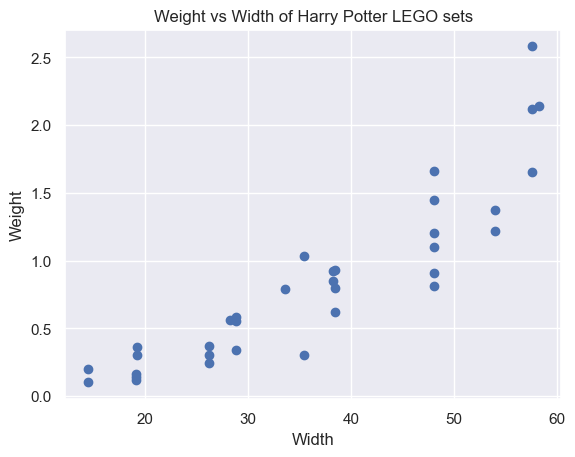

In [2]:
X_train = df.filter(["Width"]).values.reshape(-1, 1)
y_train = df.filter(["Weight"]).values.reshape(-1, 1)

sns.set_theme()
plt.scatter(X_train, y_train)
plt.title("Weight vs Width of Harry Potter LEGO sets")
plt.xlabel("Width")
plt.ylabel("Weight")
plt.show()

## Linear regression neuron
Now, we begin to implement our linear regression neuron. We will implement the `SingleNeuron` abstract class as a Perceptron by giving it the appropriate `activation`, `update`, and `cost_function` methods. See `Neuron.ipynb` for more information about the single-neuron model.

As a review: Let $m$ be the number of explanatory variables; in this case $m=1$ because width is our only explanantory variable. Let $w \in \mathbb{R}^m$ represent the neuron weights and $b \in \mathbb{R}$ represent the neuron bias. For data point $i$ with input signal $x \in \mathbb{R}^m$ and response value (weight) $y^i \in \mathbb{R}$, the preactivation value is $z^i = w \cdot x^i + b$.

For a linear regression neuron, the activation function is notable for returning the preactivation value. That is, the activation function is defined by $\hat y^i = \phi(z^i) = z^i$, so the neuron's prediction is equivalent to $\hat y^i = z^i = w \cdot x^i + b$.

The cost function for linear regression is the mean of the squared-error of each of the neuron's predictions. This is formulated as $c(w, b) = \frac{1}{2n} \sum\limits_{i \in [n]} (\hat y^i - y^i)^2$. We would like to minimize our cost function using gradient descent. Since $\forall j \in [m], \frac{\delta}{\delta w_j} \hat y^i = x^i$ and $\frac{\delta}{\delta b} \hat y^i = 1$, we have the gradient:

$
\begin{align*}
\frac{\delta}{\delta w_j} c(w, b) =& \frac{\delta}{\delta w_j} \frac{1}{2n} \sum\limits_{i \in [n]} (\hat y^i - y^i)^2 \\
    =& \frac{1}{2n} \sum\limits_{i \in [n]} \frac{\delta}{\delta w_j} (\hat y^i - y^i)^2 \\
    =& \frac{1}{2n} \sum\limits_{i \in [n]} 2(\hat y^i - y^i) x^i \\
    =& \frac{1}{n} \sum\limits_{i \in [n]} (\hat y^i - y^i) x^i \\
\frac{\delta}{\delta b} c(w, b) =& \frac{\delta}{\delta w_j} \frac{1}{2n} \sum\limits_{i \in [n]} (\hat y^i - y^i)^2 \\
    =& \frac{1}{2n} \sum\limits_{i \in [n]} \frac{\delta}{\delta b} (\hat y^i - y^i)^2 \\
    =& \frac{1}{2n} \sum\limits_{i \in [n]} 2(\hat y^i - y^i) \\  
    =& \frac{1}{n} \sum\limits_{i \in [n]} (\hat y^i - y^i)   
\end{align*}
$

### Batch gradient descent
From the gradient we computed, we have the following update rule: Each epoch, compute $(\hat y^i - y^i)$ for each data point $i \in [n]$. Then, at update the weights and bias for some learning rate $\alpha$ by
1. $w \gets w - \alpha \frac{1}{n} \sum\limits_{i \in [n]} (\hat y^i - y^i) x^i$
2. $b \gets b - \alpha \frac{1}{n} \sum\limits_{i \in [n]} (\hat y^i - y^i)$

Batch gradient descent is very stable; that is, the process has a high likelihood of converging to a global minimum instead of getting stuck in a local minimum or cycling between weights. However, batch gradient descent is slow and memory-intensive because it requires prediction of the entire dataset before updating the weights. Stochastic gradient descent is faster.

### Stochastic gradient descent
A faster implementation of gradient descent is stochastic gradient descent. Batch gradient descent is slow because it predicts the entire dataset and then updating the weights once. Instead, we can randomly select a single data point, update the weights based on the gradient at that data point, then repeat. (Alternatively, instead of randomly selecting a single data point, we can select the data points sequentially as they appear in the dataset.) Formally:
1. Foreach data point $i \in [n]$:
    1. $w \gets w - \alpha (\hat y^i - y^i) x^i$
    2. $b \gets b - \alpha (\hat y^i - y^i)$

Although stochastic gradient descent is faster and less memory-intensive, stochastic gradient descent risks finding local minima or oscillating between weights. We will use stochastic gradient descent in our implementation of the linear regression neuron.

### Mini-batch gradient descent
A compromise between batch and stochastic gradient is to select a small subset of the dataset, update weights based on the gradient across that subset, then select another subset and repeat. This may have the stability of batch descent while keeping some of the speed of stochastic descent. But the implementation is more complicated, so we will opt to use stochastic descent. An outline for mini-batch descent is as follows:
1. Partition the dataset $[n]$ into $N_1,...,N_r$. Foreach partition $k \in [r]$:
    1. $w \gets w - \alpha \frac{1}{|N_k|} \sum\limits_{i \in [N_k]} (\hat y^i - y^i) x^i$
    2. $b \gets b - \alpha \frac{1}{|N_k|} \sum\limits_{i \in [N_k]} (\hat y^i - y^i)$

In [3]:
class LinearRegression(SingleNeuron):
    '''
    Implementation of abstract SingleNeuron class as Linear Regression.
    
    ADDITIONAL ATTRIBUTES
        alpha    scalar learning rate for update function based on stochastic gradient descent
    '''
    
    alpha = 10 ** -4    # scalar learning rate for update function based on stochastic gradient descent. default initialized value.
    
    def activation(self, preactivation):
        '''
        RETURNS the preactivation value, without any modification.
        '''
        return preactivation
    
    def update(self, actual, predicted, signal):
        '''
        Updates the model weights using the Perceptron update rule for the prediction on a given data point
        INPUT
            actual; the observed actual indicator y_i
            predicted; the predicted indicator yhat_i
            signal; the input signal x_i
        '''
        self.weights = self.weights - self.alpha * (predicted - actual) * np.transpose(signal)
        self.bias = self.bias - self.alpha * (predicted - actual)

    def cost_function(self, actual, predicted, signal):
        '''
        RETURNS the squared error of the prediction.
        INPUT
            actual; the observed actual indicator y_i
            predicted; the predicted indicator yhat_i
            signal; the input signal x_i
        RETURNS
            the squared error of the prediction
        '''
        return (predicted - actual) ** 2

Next, train the model. Arbitrarily, let's train for 100 epochs with a learning rate of $\alpha=10^{-4}$.

In [4]:
lin_mdl = LinearRegression()
lin_mdl.alpha = 10 ** -4
errors = lin_mdl.train(X_train, y_train, n_epoch=100)

Cost: 4.61446: 100%|██████████| 100/100 [00:00<00:00, 493.85it/s]


## Linear model performance
As we did for the Perceptron, let's plot the cost function for each epoch to see how to model improved as it trained.

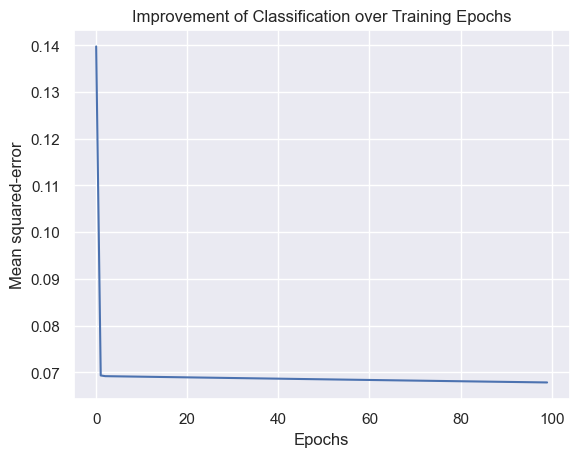

MSE after last epoch: 0.06785977711899675


In [5]:
sns.set_theme()
plt.plot([err / (2 * n_sample) for err in errors])
plt.title("Improvement of Classification over Training Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean squared-error")
plt.show()
print("MSE after last epoch:", errors[-1] / (2 * n_sample))

We see drastic improvement in MSE in the early epochs. Afterward, the cost function seems to plateau. It looks like the model is well-trained. Finally, let's see how our line-of-best-fit looks on top of our dataset.

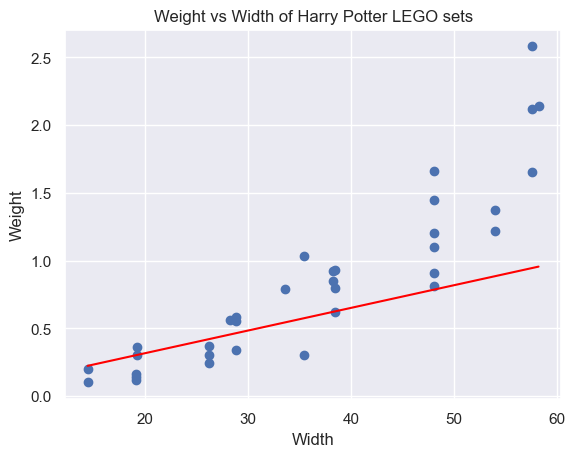

In [6]:
xdom = np.linspace(np.min(X_train), np.max(X_train), n_sample).reshape(-1, 1)
plt.scatter(X_train, y_train)
plt.plot(xdom, lin_mdl.predict(xdom), c="red")
plt.title("Weight vs Width of Harry Potter LEGO sets")
plt.xlabel("Width")
plt.ylabel("Weight")
plt.show()

## Modification of linear model
Hmm. The line-of-best-fit does not look like a great way to predict weight from width. While the line does pass through the bulk of the data and seems to be oriented at a reasonable slope, it looks like the dataset has some nonlinear relationship. As the width grows, the weight seems to grow polynomially or exponentially instead of linearly like we assumed. As such, our line does not capture the upward curve of the weight. Let's take a look at the residuals (`actual - predicted`) to study the potential nonlinearity of the dataset.

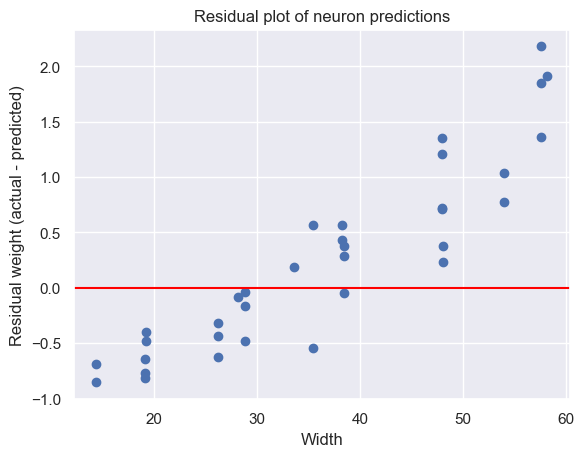

In [7]:
plt.scatter(X_train, y_train - lin_mdl.predict(xdom))
plt.axhline(y=0, c="red")
plt.title("Residual plot of neuron predictions")
plt.xlabel("Width")
plt.ylabel("Residual weight (actual - predicted)")
plt.show()

If the weight and width were linearly related, then the residuals should be randomly distributed about the $y=0$ horizontal line. Since the residuals are instead distributed about the horizontal line with a distinct pattern, we can be confident that the weight and width are NOT linearly related. A linear model overestimates weights for small widths and underestimates weights for large widths.

When a linear model fails, we can re-examine the mechanics of our physical subjects. In this case, it makes more sense for weight to be related to the cube of the width. This is because weight is typically proportional to volume, and volume is related to the cube of the linear dimensions (length $\times$ width $\times$ height).

How to model a cubic relationship using a linear regression model? We can replace our response variable `y_train` with the cube-root of `y_train`, and use this cube as our new response variable. Let's train a new model.

Cost: 4158924.61587: 100%|██████████| 1000/1000 [00:02<00:00, 470.78it/s] 


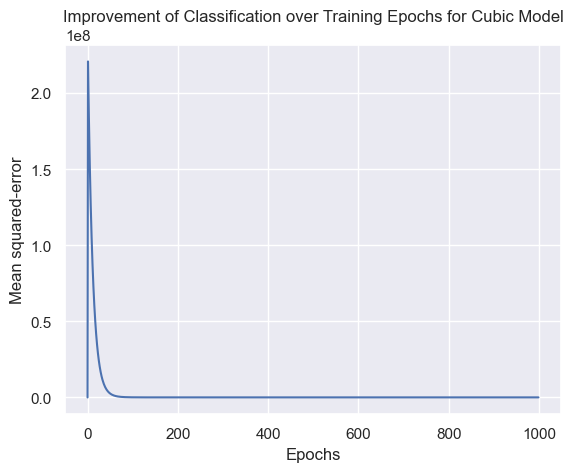

MSE after last epoch: 61160.656115807564


In [18]:
# Train model
root_y_train = y_train ** -3
cube_mdl = LinearRegression()
cube_mdl.alpha = 10 ** -3
errors = cube_mdl.train(X_train, root_y_train, n_epoch=1000)

# Visualize cost function
plt.plot([err / (2 * n_sample) for err in errors])
plt.title("Improvement of Classification over Training Epochs for Cubic Model")
plt.xlabel("Epochs")
plt.ylabel("Mean squared-error")
plt.show()
print("MSE after last epoch:", errors[-1] / (2 * n_sample))

As expected, the cost function declines steadily as the number of training epochs grow. Let's see if it performs any better than our linear model.

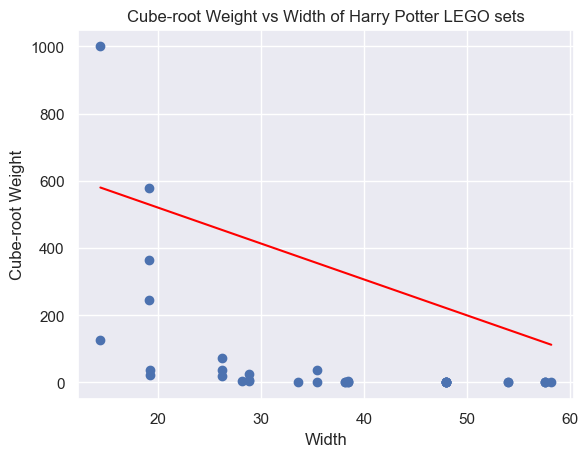

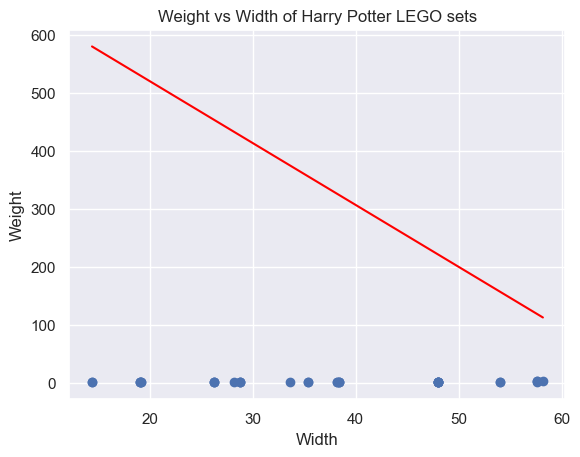

In [22]:
plt.scatter(X_train, root_y_train)
plt.plot(xdom, cube_mdl.predict(xdom), c="red")
plt.title("Cube-root Weight vs Width of Harry Potter LEGO sets")
plt.xlabel("Width")
plt.ylabel("Cube-root Weight")
plt.show()

plt.scatter(X_train, y_train)
plt.plot(xdom, cube_mdl.predict(xdom), c="red")
plt.title("Weight vs Width of Harry Potter LEGO sets")
plt.xlabel("Width")
plt.ylabel("Weight")
plt.show()